Beginning animation


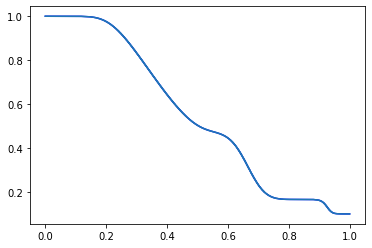

In [58]:
#basic imports
import numpy as np
from matplotlib import pylab as plt
from celluloid import Camera as cam
#define size of domain:
n = 1000
x_arr = np.linspace(0,1,n)
dx = 1/n
gamma=5/3

#define time parameters
t_current=0
t_end = .2
dt = 1e-4
#set up array of initial conditions
#conserved quantities are density,momentum,energy
u_0= np.zeros((3,n))
#left hand side
u_0[0,0:int(.5*n)]=1 #density
u_0[1,0:int(.5*n)]=0 #momentum
u_0[2,0:int(.5*n)]=1/(gamma-1) #energy
#right hand side
u_0[0,int(.5*n):]=.1 #density
u_0[1,int(.5*n):]=0 #momentum
u_0[2,int(.5*n):]=.125/(gamma-1) #energy
fig = plt.figure()
Cam = cam(fig) #for movie making
while t_current<=t_end:
    #determine godunov F^n
    F=np.zeros(u_0.shape)
    rho = u_0[0,:] #intermediate density list
    vel=(u_0[1,:]/u_0[0,:]) #intermediate velocity list
    press=(gamma-1)*(u_0[2,:]-(rho/2*vel**2)) #intermediate pressure list
    F[0,:]=u_0[1,:] #momentum
    F[1,:]=rho*(vel**2)+press#rho*v^2+P
    F[2,:]=vel*(u_0[2,:]+press)
    #determine dFdx
    dFdx=np.zeros(u_0.shape)
    dFdx[0,1:-1]=F[0,0:-2]-F[0,2:]
    dFdx[1,1:-1]=F[1,0:-2]-F[1,2:]
    dFdx[2,1:-1]=F[2,0:-2]-F[2,2:]
    #increment u,note we leave the boundaries the same
    u_plus1 = u_0 #initialize u_plus1
    u_plus1[0,1:-1]=.5*(u_0[0,0:-2]+u_0[0,2:])-(dt/(2*dx))*dFdx[0,1:-1]
    u_plus1[1,1:-1]=.5*(u_0[1,0:-2]+u_0[1,2:])-(dt/(2*dx))*dFdx[1,1:-1]
    u_plus1[2,1:-1]=.5*(u_0[2,0:-2]+u_0[2,2:])-(dt/(2*dx))*dFdx[2,1:-1]
    #print(u_plus1)
    u_0=u_plus1 #update u_0
    #print(t_current)
    plt.plot(x_arr,u_0[0],color='b')
    Cam.snap()
    t_current+=dt

plt.plot(x_arr,u_0[0])

print('Beginning animation')
anim = Cam.animate(blit=False,interval=5)
anim.save('hydro_hw.mp4')